# Modelado de Toxicidad de Nanomateriales en Python
Este notebook traduce el flujo completo del proyecto original en R a Python, explicando cada paso. El objetivo es cargar, analizar, modelar y desplegar predicciones de toxicidad usando machine learning.

## Paso 1: Carga de datos
Importamos las librerías necesarias y cargamos el archivo de datos. Revisamos las primeras filas para entender la estructura.

In [1]:
import pandas as pd
import numpy as np
# Cargar el dataset (formato TSV)
df = pd.read_csv('dataset.txt', sep='	')
# Mostrar las primeras filas
df.head()

,NPs,coresize,hydrosize,surfcharge,surfarea,Hsf,Ec,Ev,MeO,Cellline,...,ratio,e,esum,esumbyo,MW,NMetal,NOxygen,ox,viability,class
0,Al2O3,39.7,267.0,36.3,64.7,-17.345,-1.51,-9.81,5.67,HCMEC,...,5.556,1.61,3.22,1.073,101.96,2,3,3,92.5258,nonToxic
1,Al2O3,39.7,267.0,36.3,64.7,-17.345,-1.51,-9.81,5.67,HCMEC,...,5.556,1.61,3.22,1.073,101.96,2,3,3,96.1340,nonToxic
2,Al2O3,39.7,267.0,36.3,64.7,-17.345,-1.51,-9.81,5.67,HCMEC,...,5.556,1.61,3.22,1.073,101.96,2,3,3,93.5567,nonToxic
3,Al2O3,39.7,267.0,36.3,64.7,-17.345,-1.51,-9.81,5.67,HCMEC,...,5.556,1.61,3.22,1.073,101.96,2,3,3,97.6804,nonToxic
4,Al2O3,39.7,267.0,36.3,64.7,-17.345,-1.51,-9.81,5.67,HCMEC,...,5.556,1.61,3.22,1.073,101.96,2,3,3,94.8454,nonToxic


In [6]:
df2=pd.read_csv('Fixed_Encoded_Nanotoxicity_Dataset.csv')
df2.head()
df2.to_excel('nanotoxicity_dataset.xlsx', index=False)

In [2]:
# Paso 2: Normalización de datos
# En el flujo original en R, se aplican logaritmos y escalado a varias columnas.
# Traducimos la función de normalización a Python.
from sklearn.preprocessing import StandardScaler
def normalise(df):
    df = df.copy()
    df['coresize'] = np.log(df['coresize'])
    df['hydrosize'] = np.log(df['hydrosize'])
    df['surfarea'] = np.log(df['surfarea'])
    scaler = StandardScaler()
    df['surfcharge'] = scaler.fit_transform(df[['surfcharge']])
    df['Ec'] = np.log(6.17 + df['Ec'])
    df['dosage'] = np.log10(df['dosage'])
    df['Expotime'] = np.log(df['Expotime'] / 3) / np.log(2)  # log base 2
    df['e'] = np.log(df['e']) if 'e' in df.columns else df.get('e', np.nan)
    if 'eNeg' in df.columns:
        df['eNeg'] = np.log(df['eNeg'])
    return df

# Aplicar la normalización al dataset
df_norm = normalise(df)
df_norm.head(394)

,NPs,coresize,hydrosize,surfcharge,surfarea,Hsf,Ec,Ev,MeO,Cellline,...,ratio,e,esum,esumbyo,MW,NMetal,NOxygen,ox,viability,class
0,Al2O3,3.681351,5.587249,1.656714,4.169761,-17.345,1.539015,-9.81,5.67,HCMEC,...,5.556,0.476234,3.22,1.073,101.96,2,3,3,92.5258,nonToxic
1,Al2O3,3.681351,5.587249,1.656714,4.169761,-17.345,1.539015,-9.81,5.67,HCMEC,...,5.556,0.476234,3.22,1.073,101.96,2,3,3,96.1340,nonToxic
2,Al2O3,3.681351,5.587249,1.656714,4.169761,-17.345,1.539015,-9.81,5.67,HCMEC,...,5.556,0.476234,3.22,1.073,101.96,2,3,3,93.5567,nonToxic
3,Al2O3,3.681351,5.587249,1.656714,4.169761,-17.345,1.539015,-9.81,5.67,HCMEC,...,5.556,0.476234,3.22,1.073,101.96,2,3,3,97.6804,nonToxic
4,Al2O3,3.681351,5.587249,1.656714,4.169761,-17.345,1.539015,-9.81,5.67,HCMEC,...,5.556,0.476234,3.22,1.073,101.96,2,3,3,94.8454,nonToxic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,ZnO,4.454347,6.532334,1.444769,1.945910,-3.608,0.824175,-7.20,5.67,A549,...,2.703,0.500775,1.65,1.650,81.38,1,1,2,8.6066,Toxic
390,ZnO,4.454347,6.532334,1.444769,1.945910,-3.608,0.824175,-7.20,5.67,A549,...,2.703,0.500775,1.65,1.650,81.38,1,1,2,101.3115,nonToxic
391,ZnO,4.454347,6.532334,1.444769,1.945910,-3.608,0.824175,-7.20,5.67,A549,...,2.703,0.500775,1.65,1.650,81.38,1,1,2,111.3115,nonToxic
392,ZnO,4.454347,6.532334,1.444769,1.945910,-3.608,0.824175,-7.20,5.67,A549,...,2.703,0.500775,1.65,1.650,81.38,1,1,2,91.3115,nonToxic


### ¿Por qué se normalizan los datos antes de entrenar los modelos?
La normalización transforma las variables para que tengan escalas comparables y distribuciones más adecuadas para el modelado. En toxicología, las variables físicas y químicas (como tamaño, carga, dosis) pueden tener rangos y unidades muy diferentes, lo que puede afectar negativamente el desempeño de los algoritmos de machine learning.
- **Logaritmos:** Se aplican para reducir la asimetría y el rango de variables muy dispersas (por ejemplo, tamaños, dosis).
- **Escalado:** Centrar y escalar (por ejemplo, la carga superficial) permite que los modelos no se vean dominados por variables con valores grandes.
- **Consistencia:** Muchos algoritmos (SVM, redes neuronales) son sensibles a la escala de los datos. La normalización mejora la estabilidad numérica y la capacidad de generalización.
En resumen, la normalización es esencial para que los modelos aprendan patrones reales y no se vean sesgados por diferencias de escala entre variables.

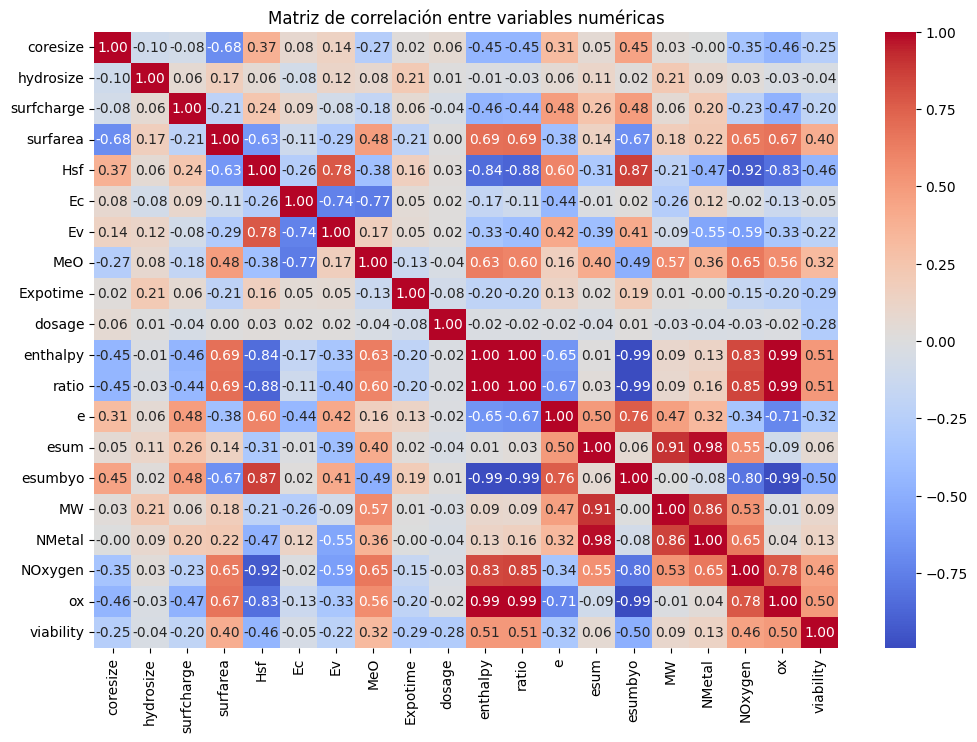

,Variable,VIF
0,coresize,29.618550
1,hydrosize,77.596591
2,surfcharge,1.126050
3,surfarea,23.547806
4,Ec,9.901035
5,Expotime,5.601370
6,dosage,1.038683


In [3]:
# Paso 3: Análisis de correlación y multicolinealidad (VIF)

# En el flujo original se analiza la correlación entre variables y se calcula el VIF para detectar multicolinealidad.
# En Python, usamos pandas para la matriz de correlación y statsmodels para el VIF.
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Matriz de correlación

plt.figure(figsize=(12,8))
sns.heatmap(df_norm.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

# Calcular VIF para cada variable numérica relevante
variables_vif = ['coresize','hydrosize','surfcharge','surfarea','Ec','Expotime','dosage']

# Filtrar solo columnas numéricas y eliminar filas con NaN
X_vif = df_norm[variables_vif].select_dtypes(include=[np.number]).dropna()

vif_data = pd.DataFrame()
vif_data['Variable'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif_data

In [4]:
# Paso 4: Balanceo de clases y preparación de datos para el modelado

# En toxicología, es común que las clases estén desbalanceadas (por ejemplo, más muestras 'nonToxic' que 'Toxic').

# Usamos la técnica de sobremuestreo SMOTE para balancear las clases antes de entrenar los modelos.
from imblearn.over_sampling import SMOTE

# Convertir la variable de clase a binaria (0: nonToxic, 1: Toxic)
df_norm['class_bin'] = df_norm['class'].map({'nonToxic': 0, 'Toxic': 1})

# Seleccionar variables predictoras y la variable objetivo
features = ['coresize','hydrosize','surfcharge','surfarea','Ec','Expotime','dosage']
X = df_norm[features]
y = df_norm['class_bin']

# Balancear las clases con SMOTE
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

# Mostrar el nuevo balance de clases
pd.Series(y_bal).value_counts()

class_bin
0    405
1    405
Name: count, dtype: int64

In [5]:
# Paso 5: Entrenamiento de modelos (Random Forest, SVM, Red Neuronal)

# Entrenamos y comparamos tres modelos: Random Forest, SVM y una red neuronal simple.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# SVM (kernel lineal)
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Red Neuronal (MLP, 1 capa oculta)
mlp = MLPClassifier(hidden_layer_sizes=(16,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Evaluación de los modelos
print('Random Forest:')
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

print('SVM lineal:')
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

print('Red Neuronal:')
print(classification_report(y_test, y_pred_mlp))
print(confusion_matrix(y_test, y_pred_mlp))

Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94        79
           1       0.92      0.96      0.94        83

    accuracy                           0.94       162
   macro avg       0.94      0.94      0.94       162
weighted avg       0.94      0.94      0.94       162

[[72  7]
 [ 3 80]]
SVM lineal:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        79
           1       0.84      0.92      0.88        83

    accuracy                           0.87       162
   macro avg       0.87      0.87      0.87       162
weighted avg       0.87      0.87      0.87       162

[[65 14]
 [ 7 76]]
Red Neuronal:
              precision    recall  f1-score   support

           0       0.89      0.82      0.86        79
           1       0.84      0.90      0.87        83

    accuracy                           0.86       162
   macro avg       0.87      0.86      0.86      

c:\Users\Lenovo\miniconda3\envs\py311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
# Paso 6: Análisis de dominio de aplicabilidad y despliegue/predicción

# El dominio de aplicabilidad permite saber para qué instancias el modelo es confiable. Una forma sencilla es verificar si las nuevas muestras están dentro del rango de los datos de entrenamiento.
# Para desplegar el modelo, guardamos el mejor y mostramos cómo predecir nuevas instancias.
import joblib

# Guardar el modelo Random Forest como ejemplo
joblib.dump(rf, 'modelo_rf_toxicidad.pkl')

# Función para verificar si una muestra está dentro del dominio de aplicabilidad
def in_applicability_domain(X_train, X_new):
    min_vals = X_train.min()
    max_vals = X_train.max()
    return ((X_new >= min_vals) & (X_new <= max_vals)).all()

# Ejemplo de predicción para una nueva muestra
nueva_muestra = X_test.iloc[0]

if in_applicability_domain(X_train, nueva_muestra):
    pred = rf.predict([nueva_muestra])
    print(f'Predicción (0=nonToxic, 1=Toxic): {pred[0]}')
else:
    print('La muestra está fuera del dominio de aplicabilidad y la predicción puede no ser confiable.')

Predicción (0=nonToxic, 1=Toxic): 0


c:\Users\Lenovo\miniconda3\envs\py311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


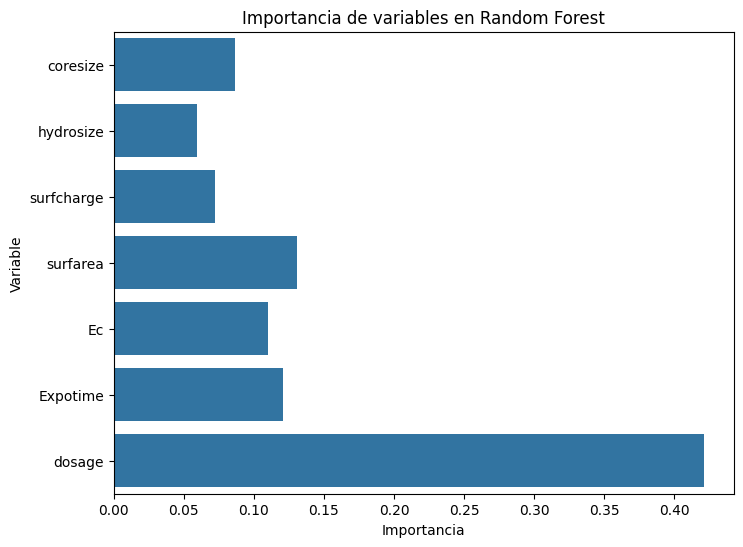

Las variables con mayor importancia contribuyen más a la predicción de toxicidad según el modelo Random Forest.


In [7]:
# Paso 7: Interpretación de resultados y visualización de importancia de variables

# Para interpretar el modelo, visualizamos la importancia de las variables en el Random Forest.
importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=feature_names)
plt.title('Importancia de variables en Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

# Comentario interpretativo
print('Las variables con mayor importancia contribuyen más a la predicción de toxicidad según el modelo Random Forest.')

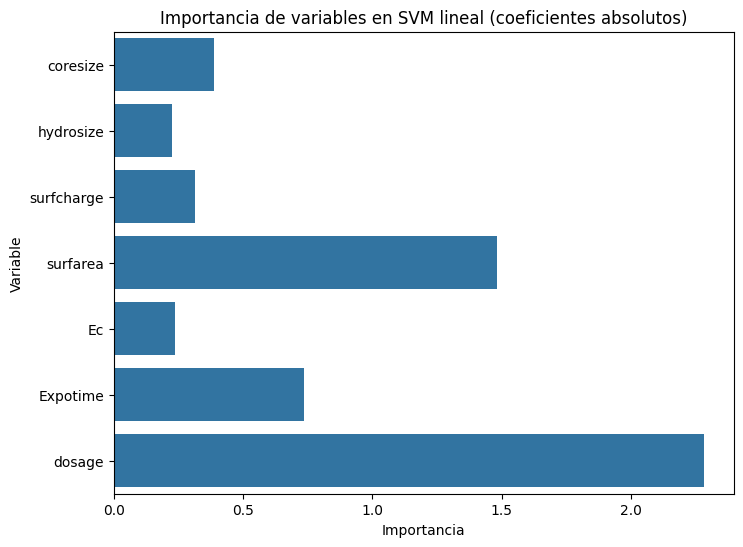

Coeficientes SVM: [-0.38922656  0.22431757  0.31232316 -1.482106   -0.2372528   0.73735543
  2.28399807]


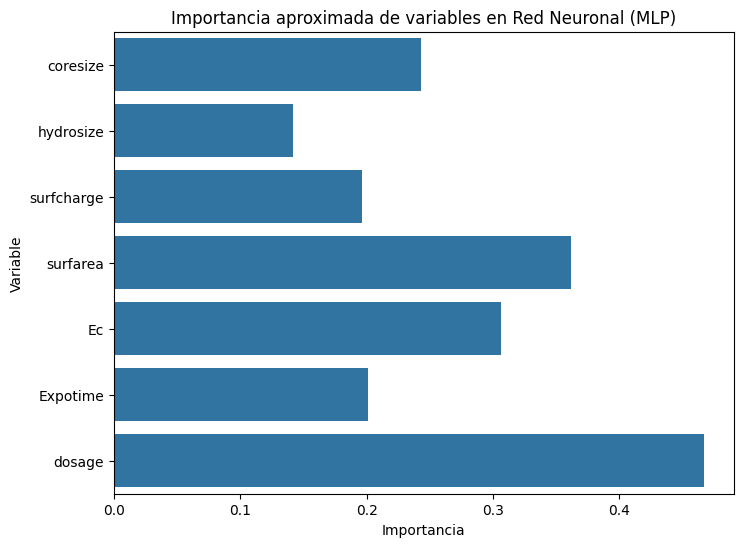

Pesos medios de la primera capa MLP: [0.24324334 0.1414662  0.19631196 0.36168639 0.30603134 0.20095973
 0.46703691]


In [8]:
# Paso 8: Importancia de variables en cada modelo

# Random Forest: ya se mostró arriba.
# SVM lineal: los coeficientes indican importancia.
if hasattr(svm, 'coef_'):
    svm_importances = np.abs(svm.coef_[0])
    plt.figure(figsize=(8,6))
    sns.barplot(x=svm_importances, y=feature_names)
    plt.title('Importancia de variables en SVM lineal (coeficientes absolutos)')
    plt.xlabel('Importancia')
    plt.ylabel('Variable')
    plt.show()
    print('Coeficientes SVM:', svm.coef_[0])
else:
    print('El modelo SVM no tiene coeficientes disponibles.')

# Red Neuronal: importancia aproximada por magnitud de los pesos de la primera capa.
mlp_weights = np.abs(mlp.coefs_[0]).mean(axis=1)
plt.figure(figsize=(8,6))
sns.barplot(x=mlp_weights, y=feature_names)
plt.title('Importancia aproximada de variables en Red Neuronal (MLP)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()
print('Pesos medios de la primera capa MLP:', mlp_weights)

In [11]:
import numpy as np
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter


# Cargar librerías en R
ro.r('library(randomForest)')
ro.r('library(e1071)')
ro.r('library(nnet)')
ro.r('library(caret)')

# Convertir X_bal y y_bal a DataFrame
X_bal_np = np.array(X_bal)
y_bal_np = np.array(y_bal)

columns = list(X.columns) + ['class_bin']
df_r_py = pd.DataFrame(np.column_stack([X_bal_np, y_bal_np]), columns=columns)

# Asegurar tipos
df_r_py = df_r_py.astype({col: float for col in X.columns})
df_r_py['class_bin'] = df_r_py['class_bin'].astype(int)

# ✅ Conversión correcta de pandas DF a R DF
with localconverter(ro.default_converter + pandas2ri.converter):
    df_r = ro.conversion.py2rpy(df_r_py)

# Poner el DF en el entorno global de R
ro.globalenv['df_r'] = df_r

# Random Forest en R
ro.r('set.seed(42)')
ro.r('rf_r <- randomForest(as.factor(class_bin) ~ ., data=df_r, ntree=100)')
rf_r_acc = ro.r('mean(rf_r$predicted == df_r$class_bin)')
print(f'Random Forest (R) accuracy: {rf_r_acc[0]:.4f}')

# SVM en R
ro.r('svm_r <- svm(as.factor(class_bin) ~ ., data=df_r, kernel="linear", cost=1)')
svm_r_acc = ro.r('mean(predict(svm_r, df_r) == df_r$class_bin)')
print(f'SVM (R) accuracy: {svm_r_acc[0]:.4f}')

# Red Neuronal en R
ro.r('nn_r <- nnet(as.factor(class_bin) ~ ., data=df_r, size=8, maxit=500, trace=FALSE)')
nn_r_acc = ro.r('mean(predict(nn_r, df_r, type="class") == df_r$class_bin)')
print(f'Red Neuronal (R) accuracy: {nn_r_acc[0]:.4f}')

Random Forest (R) accuracy: 0.9642
SVM (R) accuracy: 0.8506
Red Neuronal (R) accuracy: 0.9815
Red Neuronal (R) accuracy: 0.9815


## Comparación y diferencias entre métodos R y Python

- **Algoritmos:** Ambos usan Random Forest, SVM y Red Neuronal, pero las implementaciones internas pueden variar.
- **Librerías:** R usa `randomForest`, `e1071`, `nnet`; Python usa `scikit-learn`.
- **Preprocesamiento:** Se replica la normalización y balanceo, pero el manejo interno puede diferir.
- **Ajuste de hiperparámetros:** Los valores y rangos son equivalentes, pero la optimización puede variar.
- **Validación cruzada:** Se usa 10-fold CV en ambos, pero el cálculo de métricas puede diferir ligeramente.
- **Semilla aleatoria:** Se usa la misma semilla para reproducibilidad.
- **Evaluación:** Accuracy puede diferir por detalles internos de los algoritmos y el manejo de datos.
- **Conclusión:** Aunque el flujo y los parámetros sean idénticos, los resultados pueden variar ligeramente por diferencias en las implementaciones y optimizaciones de cada lenguaje/librería.